<p>
 <img src="ayitianalytics.png" alt="Ayiti Analytics"width=400 />
</p>

##                                       Ayiti_Analytics_Bootcamp Final_Project


## **Your Nearest Care** 

* **By: Tchalins JEUDY**
                                                                                                        August, 2020


## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## **Project Description:** <a name="introduction"></a>

One afternoon on my way home from school, I was with a friend and suddenly, he screamed with a stomach ache and quickly asked to be taken to the nearest health centre, I was lost and didn't know what to do because we were in a not very busy street, and the ambulances we called couldn't get there in time.
At that moment, I was only concerned about one thing. 

<i>"Where is the nearest health center or hospital that specializes in the treatment of this type of disease?

The project therefore consists of trying to answer this question wherever you are on Haitian territory, it can help save lives.
The purpose of this project can be of interest to everyone, especially people at risk of health problems who travel a lot in Haiti and in rural areas despite the lack of health care centers in the country.

<i>Who is the audience?

Anyone living in or visiting Haiti may be interested in this project but the most important stakeholders are: The public administration, healthcare investors and NGOs.


## Data <a name="data"></a>


In order to carry out this work, data will be needed on all the health centers and their various services offered throughout the national territory of Haiti. For this purpose, several sites have been consulted and data from several previous studies conducted by the United Nations, USAID, and the World Health Organization (WHO) are being collected. 

Source: [OCHA services](https://data.humdata.org/dataset/haiti-healthsites)
        [DHS;SPA,santé 2007](https://dhsprogram.com/publications/publication-spa14-spa-final-reports.cfm)


## Methodology <a name="methodology"></a>

In [1]:
!pip install folium
!pip install geopy
print('librairies installed')

librairies installed


## EDA

In [15]:
#import our library
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import time

import json

import requests
from pandas.io.json import json_normalize
#from bs4 import BeautifulSoup
#from selenium import webdriver

import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from math import pi
from sklearn import preprocessing
from sklearn.cluster import KMeans
# tranforming json file into a pandas dataframe library
######from pandas.io.json import json_normalize#######
from geopy.geocoders import Nominatim 
import folium

#### Load our Dataset 

In [16]:
dfsites=pd.read_csv('commune3.csv')#, encoding = "ISO-8859-1")
#dfsites is a dataframe contain the health center of Haiti by the type and the geolocalisation values
dfsites.head()

,Name,Type,Category,Country,lat,lon,geocode,Département,section communale,commune
0,HOPITAL LA PROVIDENCE,node,hospital,HT,19.450206,-72.685424,"19.450206 , -72.685424",Artibonite,1re Pont Tamarin,Commune des Gonaïves
1,Le Sourire,node,hospital,HT,18.508700,-72.630274,"18.5087003 , -72.6302745",Ouest,1re Dessources,Commune Léogâne
2,"Dispensaire ""N.D. des Malades""",node,hospital,HT,18.191978,-73.744801,"18.1919778 , -73.7448006",Sud,1re Bourdet,Commune Les Cayes
3,French Hospital,node,hospital,HT,18.540614,-72.316322,"18.5406142 , -72.3163221",Ouest,6e Turgeau,Pòtoprens
4,Help Hospital,node,hospital,HT,18.505911,-72.625009,"18.5059105 , -72.6250088",Ouest,1re Dessources,Commune Léogâne


The dataset dfsites is now ready for cleaning!

In [17]:
#dfpro is a dataframe contain the caracteristics of  health sites in Haiti by number and the type 
dfpro=pd.read_sas('HTFC7AFLSP.SAS7BDAT',encoding='latin8')
dfpro

,FACIL,REC_TYPE,DEPART,DEPARTN,VILCOM,VILCOMN,LOCALITY,FACTYPE,MGA,FTYPE,...,Q3180,Q3181,Q3182,Q3183,Q3184,Q3185,Q3200,Q3201,Q3201A,Q3201B
0,1.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,7.0,3.0,1.0,...,1.0,1.0,5.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN
1,2.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,3.0,1.0,1.0,...,4.0,2.0,5.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN
2,3.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,6.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN
3,4.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,5.0,3.0,1.0,...,2.0,1.0,4.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN
4,5.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,6.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3244.0,A,1.0,Ouest,21.0,L!og!ne,3.0,6.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN
1029,3245.0,A,2.0,Sud'est,11.0,Jacmel,3.0,7.0,2.0,2.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN
1030,3261.0,A,1.0,Ouest,2.0,Arcahaie,2.0,6.0,3.0,2.0,...,1.0,1.0,5.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN
1031,3262.0,A,6.0,Centre,6.0,Mirbalais,3.0,6.0,3.0,2.0,...,2.0,1.0,5.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN


In [18]:
#columns list of the dataset dfpro 
col_total=dfpro.columns.to_list()
col_total[:10]

['FACIL',
 'REC_TYPE',
 'DEPART',
 'DEPARTN',
 'VILCOM',
 'VILCOMN',
 'LOCALITY',
 'FACTYPE',
 'MGA',
 'FTYPE']

In [19]:
list_c=['FACIL','DEPARTN','VILCOMN','FACTYPE','MGA','FTYPE','Q400A_01','Q400A_03','Q400A_08','Q400A_12','Q400AT','Q340','Q450','Q112','Q880','Q710_01','Q110']
for i in range(1,21):
    if i<10:
        list_c.append(f'Q102_0{i}')
    else:
        list_c.append(f'Q102_{i}')
        
list_c

['FACIL',
 'DEPARTN',
 'VILCOMN',
 'FACTYPE',
 'MGA',
 'FTYPE',
 'Q400A_01',
 'Q400A_03',
 'Q400A_08',
 'Q400A_12',
 'Q400AT',
 'Q340',
 'Q450',
 'Q112',
 'Q880',
 'Q710_01',
 'Q110',
 'Q102_01',
 'Q102_02',
 'Q102_03',
 'Q102_04',
 'Q102_05',
 'Q102_06',
 'Q102_07',
 'Q102_08',
 'Q102_09',
 'Q102_10',
 'Q102_11',
 'Q102_12',
 'Q102_13',
 'Q102_14',
 'Q102_15',
 'Q102_16',
 'Q102_17',
 'Q102_18',
 'Q102_19',
 'Q102_20']

In [20]:
#a view of the observation in a variable for selecting some for the project
dfpro.DEPARTN.unique()

array(['Ouest', "Sud'est", 'Nord', "Nord'Est", 'Artibonite', 'Centre',
       'Sud', "Grand'Anse", "Nord'Ouest", 'Nippes'], dtype=object)

In [21]:
#dfprof is a dataframe contains the variables selected from dfpro
dfp=dfpro[list_c]
dfp.head()

,FACIL,DEPARTN,VILCOMN,FACTYPE,MGA,FTYPE,Q400A_01,Q400A_03,Q400A_08,Q400A_12,...,Q102_11,Q102_12,Q102_13,Q102_14,Q102_15,Q102_16,Q102_17,Q102_18,Q102_19,Q102_20
0,1.0,Ouest,Port-Au-Prince,7.0,3.0,1.0,2.0,1.0,2.0,0.0,...,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2.0,Ouest,Port-Au-Prince,3.0,1.0,1.0,1.0,1.0,10.0,0.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
2,3.0,Ouest,Port-Au-Prince,6.0,3.0,1.0,7.0,25.0,54.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,4.0,Ouest,Port-Au-Prince,5.0,3.0,1.0,2.0,4.0,3.0,0.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
4,5.0,Ouest,Port-Au-Prince,6.0,2.0,1.0,0.0,2.0,2.0,0.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0


In [22]:
dfp.columns

Index(['FACIL', 'DEPARTN', 'VILCOMN', 'FACTYPE', 'MGA', 'FTYPE', 'Q400A_01',
       'Q400A_03', 'Q400A_08', 'Q400A_12', 'Q400AT', 'Q340', 'Q450', 'Q112',
       'Q880', 'Q710_01', 'Q110', 'Q102_01', 'Q102_02', 'Q102_03', 'Q102_04',
       'Q102_05', 'Q102_06', 'Q102_07', 'Q102_08', 'Q102_09', 'Q102_10',
       'Q102_11', 'Q102_12', 'Q102_13', 'Q102_14', 'Q102_15', 'Q102_16',
       'Q102_17', 'Q102_18', 'Q102_19', 'Q102_20'],
      dtype='object')

In [23]:
#list of new variables name's  
list_v=['facil','departn','vilcomn','FACTYPE','MGA','FTYPE','Doc_General','Tech_lab','Nurse','drugist','Staff','Electricity_regular','Ambulance_regular','beds','Machine_radio','Water_run','S.Vac_Child','S.Croissance_Child','S_Child','S.Familial_PLanning','S.CPN','S.CPN_vih','S.Accouchement','S.Malaria','S.IST','S.TB','ST.TB','S.VIH','ST.VIH','ST.VIH2','S.Chroniques','S.PChirurgie','SPCésarienne','S.Lab.','S.LabGS','S.TransS','S.Dentaire']

In [24]:
#rename columns of dfprof
dfp.columns=list_v
dfp.head()

,facil,departn,vilcomn,FACTYPE,MGA,FTYPE,Doc_General,Tech_lab,Nurse,drugist,...,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire
0,1.0,Ouest,Port-Au-Prince,7.0,3.0,1.0,2.0,1.0,2.0,0.0,...,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2.0,Ouest,Port-Au-Prince,3.0,1.0,1.0,1.0,1.0,10.0,0.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
2,3.0,Ouest,Port-Au-Prince,6.0,3.0,1.0,7.0,25.0,54.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,4.0,Ouest,Port-Au-Prince,5.0,3.0,1.0,2.0,4.0,3.0,0.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
4,5.0,Ouest,Port-Au-Prince,6.0,2.0,1.0,0.0,2.0,2.0,0.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0


The dataset dfprof is now ready for cleaning!

#### Explanation of variables

In ***dfp*** we have the **variables :**

**Doc_General**         :Number of general practitioners

**Tech_lab**            :Number of laboratory technicians

**Nurse**               :Number of nurses

**drugist**             :Number of drugist

**Staff**               :total personal health site

**Electricity_regular** :ability to have continuous electricity

**Ambulance_regular**   :ability to have functional ambulances in the facility

**beds**                : number of beds avalaible

**Machine_radio**       :ability to have perform diagnostic machine

**Water_run**           :ability to have running water

**facil**               : the number of the facility

**departn**             : the geogrraphic distribution by region(department) 

**vilcomn**             : the name of the town or the city of the facility

**FACTYPE**             :Facility type

**MGA**                 :Managing authority(ownership)

**FTYPE**               :Urban/rural

In ***dfsites*** we have the **variables :**

**Département**              :  the geogrraphic distribution by region(department)

**commune**                : the geogrraphic distribution by region(city or town)

**section communale**           :the geogrraphic distribution by region(communal section)

**Name**    :the name of the healthsite

**Catégorie**           :the category of the center according to the WHO classification

**lat**               :the geolocalisation data(latitude)

**lon**              :the geolocalisation data(longitude)

### Data Cleaning

**cleaning dfsites :**

In [25]:
#check for nul values
dfsites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 10 columns):
Name                 2002 non-null object
Type                 2002 non-null object
Category             2002 non-null object
Country              2002 non-null object
lat                  2002 non-null float64
lon                  2002 non-null float64
geocode              2002 non-null object
Département          2002 non-null object
section communale    2002 non-null object
commune              2002 non-null object
dtypes: float64(2), object(8)
memory usage: 156.5+ KB


In [29]:
#drop the unknown communal section
dfsites.drop( dfsites[ dfsites['section communale'] == 'Inconnu' ].index , inplace=True)

In [33]:
#a quick view of the basic statistics
dfsites.describe()

,lat,lon
count,2002.000000,2002.000000
mean,18.877322,-72.582571
std,0.530937,0.583655
min,18.041889,-74.453923
25%,18.527466,-72.700955
50%,18.602607,-72.342768
75%,19.443176,-72.252496
max,20.044702,-71.679904


In [34]:
#replace for the good synthax
dfsites['commune']=dfsites['commune'].replace('Pòtoprens','Port-au-Prince')

In [35]:
dfsites['commune']=dfsites['commune'].replace('Petyonvil','Pétion-ville')

In [36]:
dfsites['commune']=dfsites['commune'].replace('Kafou','Carrefour')

In [37]:
list_co=['Commune de','Commune']
for replacer in list_co:
    dfsites['commune']=dfsites['commune'].str.replace(replacer,'')

In [38]:
#checking for correct calls
dfsites.Name.value_counts()

unknown name                                195
Medical Center                                5
Pharmacie                                     4
Dispensaire Saint Joseph                      3
Centre de Santé                               3
                                           ... 
Hopital Rama                                  1
carme pharma                                  1
CENTRE hOSPITALIER COMMUNAUTAIRE URGENCE      1
pharmacie dieu soit loue                      1
Dispensaire d'Arniquet                        1
Name: Name, Length: 1760, dtype: int64

In [39]:
#Create a new dataframe where healthsite is known
dfsite = dfsites[dfsites['Name'] != 'unknown name']
dfsite.head()

,Name,Type,Category,Country,lat,lon,geocode,Département,section communale,commune
0,HOPITAL LA PROVIDENCE,node,hospital,HT,19.450206,-72.685424,"19.450206 , -72.685424",Artibonite,1re Pont Tamarin,s Gonaïves
1,Le Sourire,node,hospital,HT,18.508700,-72.630274,"18.5087003 , -72.6302745",Ouest,1re Dessources,Léogâne
2,"Dispensaire ""N.D. des Malades""",node,hospital,HT,18.191978,-73.744801,"18.1919778 , -73.7448006",Sud,1re Bourdet,Les Cayes
3,French Hospital,node,hospital,HT,18.540614,-72.316322,"18.5406142 , -72.3163221",Ouest,6e Turgeau,Port-au-Prince
4,Help Hospital,node,hospital,HT,18.505911,-72.625009,"18.5059105 , -72.6250088",Ouest,1re Dessources,Léogâne


In [40]:
#type of the variables
dfsites.dtypes

Name                  object
Type                  object
Category              object
Country               object
lat                  float64
lon                  float64
geocode               object
Département           object
section communale     object
commune               object
dtype: object

In [41]:
dfsite.shape

(1807, 10)

the dfsite is now ready for analysis!

**Cleaning dfp:**

In [42]:
dfp.dtypes

facil                  float64
departn                 object
vilcomn                 object
FACTYPE                float64
MGA                    float64
FTYPE                  float64
Doc_General            float64
Tech_lab               float64
Nurse                  float64
drugist                float64
Staff                  float64
Electricity_regular    float64
Ambulance_regular      float64
beds                   float64
Machine_radio          float64
Water_run              float64
S.Vac_Child            float64
S.Croissance_Child     float64
S_Child                float64
S.Familial_PLanning    float64
S.CPN                  float64
S.CPN_vih              float64
S.Accouchement         float64
S.Malaria              float64
S.IST                  float64
S.TB                   float64
ST.TB                  float64
S.VIH                  float64
ST.VIH                 float64
ST.VIH2                float64
S.Chroniques           float64
S.PChirurgie           float64
SPCésari

In [53]:
#sum of nul variables 
dfp.isnull().sum()

facil                  0
departn                0
vilcomn                0
FACTYPE                0
MGA                    0
FTYPE                  0
Doc_General            0
Tech_lab               0
Nurse                  0
drugist                0
Electricity_regular    0
Ambulance_regular      0
Machine_radio          0
Water_run              0
S.Vac_Child            0
S.Croissance_Child     0
S_Child                0
S.Familial_PLanning    0
S.CPN                  0
S.CPN_vih              0
S.Accouchement         0
S.Malaria              0
S.IST                  0
S.TB                   0
ST.TB                  0
S.VIH                  0
ST.VIH                 0
ST.VIH2                0
S.Chroniques           0
S.PChirurgie           0
SPCésarienne           0
S.Lab.                 0
S.LabGS                0
S.TransS               0
S.Dentaire             0
dtype: int64

In [44]:
#describe the variables by simple statistic
include =['object', 'float', 'int'] 
dfp.describe( include = include) 

,facil,departn,vilcomn,FACTYPE,MGA,FTYPE,Doc_General,Tech_lab,Nurse,drugist,...,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire
count,1033.000000,1033,1033,1033.000000,1033.000000,1033.000000,1007.00000,1007.000000,1007.000000,1007.000000,...,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
unique,NaN,10,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ouest,Port-Au-Prince,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,380,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,885.375605,NaN,NaN,5.849952,2.333979,1.624395,1.55710,1.769613,4.412115,0.267130,...,1.481629,1.839126,1.813307,1.021847,1.109235,1.893744,1.362463,1.507448,1.873883,1.837140
std,765.055136,NaN,NaN,1.203090,1.126572,0.484513,2.38669,3.834363,11.614499,2.504696,...,0.499911,0.367597,0.389859,0.146257,0.312089,0.308318,0.480950,0.500193,0.332146,0.369421
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,359.000000,NaN,NaN,5.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,679.000000,NaN,NaN,6.000000,2.000000,2.000000,1.00000,1.000000,2.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,996.000000,NaN,NaN,7.000000,3.000000,2.000000,2.00000,2.000000,3.000000,0.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Correct null values **:**

In [45]:
#replace nul value with 0 because the variables 0 represent that this service is not observed in the health site.
dfp[['Electricity_regular','Ambulance_regular','Water_run']] =dfp[['Electricity_regular','Ambulance_regular','Water_run']].fillna(0)

C:\Users\bootcamp\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
dfp.columns

Index(['facil', 'departn', 'vilcomn', 'FACTYPE', 'MGA', 'FTYPE', 'Doc_General',
       'Tech_lab', 'Nurse', 'drugist', 'Staff', 'Electricity_regular',
       'Ambulance_regular', 'beds', 'Machine_radio', 'Water_run',
       'S.Vac_Child', 'S.Croissance_Child', 'S_Child', 'S.Familial_PLanning',
       'S.CPN', 'S.CPN_vih', 'S.Accouchement', 'S.Malaria', 'S.IST', 'S.TB',
       'ST.TB', 'S.VIH', 'ST.VIH', 'ST.VIH2', 'S.Chroniques', 'S.PChirurgie',
       'SPCésarienne', 'S.Lab.', 'S.LabGS', 'S.TransS', 'S.Dentaire'],
      dtype='object')

In [47]:
list_S = ['S.Vac_Child', 'S.Croissance_Child', 'S_Child', 'S.Familial_PLanning',
       'S.CPN', 'S.CPN_vih', 'S.Accouchement', 'S.Malaria', 'S.IST', 'S.TB',
       'ST.TB', 'S.VIH', 'ST.VIH', 'ST.VIH2', 'S.Chroniques', 'S.PChirurgie',
       'SPCésarienne', 'S.Lab.', 'S.LabGS', 'S.TransS', 'S.Dentaire']

dfp[list_S]=dfp[list_S].fillna(0)

In [48]:
#replace nul value with 0 because the variables 0 represent that this service is not observed in the health site.
dfp['Machine_radio'] = dfp['Machine_radio'].fillna(0)

C:\Users\bootcamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
#replace the nul values with 1 by hypothesis that a healthsite must have at least 1 doc, 1 laboratory technician, 1 nurse and 1 drugist.
dfp[['Doc_General','Tech_lab','Nurse','drugist',]] = dfp[['Doc_General','Tech_lab','Nurse','drugist',]].fillna(1)

In [50]:
dfp=dfp.drop(['beds'], axis=1)

In [51]:
dfp=dfp.drop(['Staff'], axis=1)

In [52]:
dfp.shape

(1033, 35)

Assigning the correct value **:**

In [54]:
dfp[list_S]=dfp[list_S].replace(2,0)

In [55]:
def rep (a):
    if ((a ==2) or (a==3)):
        return "Private"
    elif (a==1):
        return "Public"
    else :
        return 'Mixte'

In [56]:
dfp['MGA']=dfp['MGA'].apply(rep)


In [57]:
def rep2 (a):
    if ((a==1) or (a ==2) or (a==3) or (a==4)):
        return "Hospital"
    elif (a==5):
        return "Healthsite with bed"
    elif (a==6):
        return 'Healthsite without bed'
    else :
        return 'Dispensary'

In [58]:
dfp['FACTYPE_letter']=dfp['FACTYPE'].apply(rep2)


In [59]:
#replace for the good synthax
list_a = [2,3]
for a in list_a:
    dfp['Electricity_regular']=dfp['Electricity_regular'].replace(a,0)

In [60]:
list_a = [2,3]
for a in list_a:
    dfp['Water_run']=dfp['Water_run'].replace(a,0)

In [61]:
list_a = [2,3]
for a in list_a:
    dfp['Ambulance_regular']=dfp['Ambulance_regular'].replace(a,0)

In [62]:
list_a = [2,3]
for a in list_a:
    dfp['Machine_radio']=dfp['Machine_radio'].replace(a,0)

In [63]:
pd.set_option('display.max_rows', None)

Knowing that the number of beds for each 1000 hab is 0.7 in Haiti according to the latest statistics published by the site [Index Mundi](https://www.indexmundi.com/fr/haiti/lits_d_hopitaux_par_habitant.html).

And given the problem we encounter with null values for the number of beds per inhabitant for some zones, we will use the number of inhabitants per zone to determine the number of beds per zone, the results will be approximate to reality.

In [64]:
dfpop = pd.read_csv('spa_boundaries_com.csv')
dfpop

,Unnamed: 0,ADM2_PCODE,ADM1_EN,ADM1_FR,ADM2_EN,ADM2_FR,geometry,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
0,0,HT0812,Grande'Anse,Grande'Anse,Abricots,Abricots,POLYGON ((-74.25822755899998 18.65056404000006...,3.870187e+04,18232,20470
1,1,HT0321,North,Nord,Acul du Nord,Acul du Nord,POLYGON ((-72.35331929799997 19.78220034300006...,6.075863e+04,30112,30646
2,2,HT0922,North-West,Nord-Ouest,Anse-a-Foleur,Anse-à-Foleur,POLYGON ((-72.63559015099997 19.90707298500007...,3.601211e+04,18030,17982
3,3,HT0234,South-East,Sud-Est,Anse-a-Pitre,Anse-à-Pître,POLYGON ((-71.74679558899999 18.29270115500003...,4.259735e+04,21074,21524
4,4,HT1021,Nippes,Nippes,Anse-a-Veau,Anse-à-Veau,POLYGON ((-73.44109300899999 18.52472265400007...,3.555646e+04,16737,18820
5,5,HT0151,West,Ouest,Anse a Galets,Anse à Galets,POLYGON ((-73.06945235299997 18.92403297200008...,7.778080e+04,38776,39006
6,6,HT0821,Grande'Anse,Grande'Anse,Anse d'Hainault,Anse d'Hainault,POLYGON ((-74.37214593499993 18.49439152000002...,3.739258e+04,17694,19697
7,7,HT0523,Artibonite,Artibonite,Anse Rouge,Anse Rouge,POLYGON ((-73.01573026299997 19.73182581000003...,5.142438e+04,25635,25789
8,8,HT0731,South,Sud,Aquin,Aquin,POLYGON ((-73.32922903599996 18.36944593700002...,1.063820e+05,52152,54229
9,9,HT0141,West,Ouest,Arcahaie,Arcahaie,POLYGON ((-72.62697543199994 18.97347171600006...,1.620119e+05,80940,81072


In [65]:
dfpop1=dfpop[['ADM1_FR','ADM2_FR','IHSI_UNFPA_2019_female','IHSI_UNFPA_2019_male']]

In [66]:
dfpop1['population']=dfpop1['IHSI_UNFPA_2019_female']+dfpop1['IHSI_UNFPA_2019_male']

C:\Users\bootcamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
dfpop1['beds']=(dfpop1['population']*0.7)/1000

C:\Users\bootcamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
dfpop1['beds']=dfpop1['beds'].apply(lambda x: np.round(x))

C:\Users\bootcamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
dfpop1.rename(columns={'ADM1_FR':'departn','ADM2_FR':'commune'},inplace=True)
dfpop1

C:\Users\bootcamp\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,departn,commune,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male,population,beds
0,Grande'Anse,Abricots,18232,20470,38702,27.0
1,Nord,Acul du Nord,30112,30646,60758,43.0
2,Nord-Ouest,Anse-à-Foleur,18030,17982,36012,25.0
3,Sud-Est,Anse-à-Pître,21074,21524,42598,30.0
4,Nippes,Anse-à-Veau,16737,18820,35557,25.0
5,Ouest,Anse à Galets,38776,39006,77782,54.0
6,Grande'Anse,Anse d'Hainault,17694,19697,37391,26.0
7,Artibonite,Anse Rouge,25635,25789,51424,36.0
8,Sud,Aquin,52152,54229,106381,74.0
9,Ouest,Arcahaie,80940,81072,162012,113.0


In [70]:
dfpop1.dtypes

departn                    object
commune                    object
IHSI_UNFPA_2019_female      int64
IHSI_UNFPA_2019_male        int64
population                  int64
beds                      float64
dtype: object

### Get dummies

In [71]:
list_d=['MGA','FACTYPE_letter']

In [72]:
dfp2=pd.get_dummies(dfp[list_d])
dfp2.head()

,MGA_Mixte,MGA_Private,MGA_Public,FACTYPE_letter_Dispensary,FACTYPE_letter_Healthsite with bed,FACTYPE_letter_Healthsite without bed,FACTYPE_letter_Hospital
0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,1
2,0,1,0,0,0,1,0
3,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0


In [73]:
dfp2.rename(columns={'MGA_Mixte':'mixte','MGA_Private':'Private','MGA_Public':'Public','FACTYPE_letter_Dispensary':'Dispensary','FACTYPE_letter_Healthsite with bed':'Healthsite with bed','FACTYPE_letter_Healthsite without bed':'Healthsite without bed','FACTYPE_letter_Hospital':'Hospital'},inplace=True)

In [74]:
df_dum=pd.concat([dfp,dfp2],axis=1)

In [75]:
df_dum.drop(list_d,axis=1,inplace=True)

In [76]:
df=df_dum.groupby(['departn','vilcomn'],as_index=False).sum()

In [82]:
dfbon1 = df.drop(['departn','vilcomn'],axis=1)
dfbon = dfbon1.drop(['facil','FACTYPE'],axis=1)

In [84]:
x = dfbon.values

#scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#x_scaled = MinMaxScaler.fit_transform(x)
scaled = scaler.fit_transform(dfbon)
#dfd1 = pd.DataFrame(x_scaled,columns =dfbon.columns)
dfd1 = pd.DataFrame(scaled)
dfd1.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.171429,0.011364,0.004329,0.010352,0.000000,0.000000,0.125,0.0000,0.078947,0.047619,...,0.025,0.0000,0.000000,0.000,0.000000,0.466667,0.333333,0.090909,0.000000,0.0000
1,0.071429,0.011364,0.008658,0.004141,0.000000,0.022222,0.000,0.0000,0.052632,0.047619,...,0.025,0.0000,0.000000,0.000,0.000000,0.200000,0.111111,0.090909,0.000000,0.0000
2,0.557143,0.039773,0.043290,0.086957,0.000000,0.088889,0.125,0.0625,0.368421,0.047619,...,0.075,0.0625,0.066667,0.250,0.306122,0.266667,0.833333,0.272727,0.052632,0.0625
3,0.171429,0.022727,0.043290,0.022774,0.010870,0.022222,0.125,0.0000,0.078947,0.047619,...,0.050,0.0000,0.066667,0.125,0.020408,0.333333,0.222222,0.000000,0.052632,0.0625
4,0.400000,0.159091,0.134199,0.262940,0.054348,0.155556,0.250,0.1250,0.263158,0.190476,...,0.200,0.0625,0.266667,0.125,0.142857,0.533333,0.444444,0.090909,0.131579,0.1250


In [86]:
list_aa=dfbon.columns.to_list()
dfd1.columns=list_aa
dfd1.head()

,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,S.Vac_Child,...,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
0,0.171429,0.011364,0.004329,0.010352,0.000000,0.000000,0.125,0.0000,0.078947,0.047619,...,0.025,0.0000,0.000000,0.000,0.000000,0.466667,0.333333,0.090909,0.000000,0.0000
1,0.071429,0.011364,0.008658,0.004141,0.000000,0.022222,0.000,0.0000,0.052632,0.047619,...,0.025,0.0000,0.000000,0.000,0.000000,0.200000,0.111111,0.090909,0.000000,0.0000
2,0.557143,0.039773,0.043290,0.086957,0.000000,0.088889,0.125,0.0625,0.368421,0.047619,...,0.075,0.0625,0.066667,0.250,0.306122,0.266667,0.833333,0.272727,0.052632,0.0625
3,0.171429,0.022727,0.043290,0.022774,0.010870,0.022222,0.125,0.0000,0.078947,0.047619,...,0.050,0.0000,0.066667,0.125,0.020408,0.333333,0.222222,0.000000,0.052632,0.0625
4,0.400000,0.159091,0.134199,0.262940,0.054348,0.155556,0.250,0.1250,0.263158,0.190476,...,0.200,0.0625,0.266667,0.125,0.142857,0.533333,0.444444,0.090909,0.131579,0.1250


#### K-Means Clustering

In [ ]:
!pip install yellowbrick

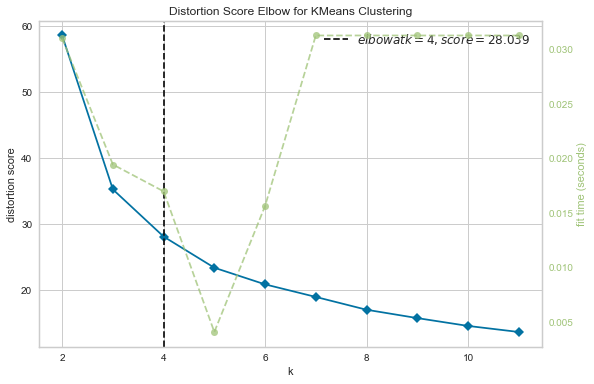

In [87]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

mpl.rcParams["figure.figsize"] = (9,6)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(dfd1)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


In [88]:
kclusters = 4

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfbon)

kmeans.labels_


array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0])

In [89]:
df.insert(0, 'Cluster Labels', kmeans.labels_)

In [90]:
#Analyze cluster, cluster 0
cluster_1=df.loc[df['Cluster Labels'] == 0]

In [91]:
#Analyze cluster, cluster 1
cluster_2=df.loc[df['Cluster Labels'] == 1]


In [92]:
#Analyze cluster, cluster 2
cluster_3=df.loc[df['Cluster Labels'] == 2]

In [93]:
#Analyze cluster, cluster 3
cluster_4=df.loc[df['Cluster Labels'] == 3]

In [106]:
df.vilcomn.value_counts()

Plaisance                         2
Tiburon                           1
Perches                           1
Les Anglais                       1
Ferrier                           1
Saint-Marc                        1
Anse-!-Foleur                     1
Croix-des-Bouquets                1
Anse-!-Pitres                     1
Arniquet                          1
Jeremie                           1
Grande-Rivi!re                    1
Thomazeau                         1
Roseaux                           1
Acul-du-Nord                      1
Abricots                          1
La Chapelle                       1
Chansolme                         1
Ennery                            1
L!og!ne                           1
P!tion-ville                      1
Grande Saline                     1
Cap-Haitien                       1
Bombardopolis                     1
Valli!res                         1
Terrier-Rouge                     1
Gona!ves                          1
Anse-Rouge                  

In [107]:
dict1={'Anse-!-Foleur':'Anse-a-Foleur','Anse-!-Pitres':'Anse-a-Pitres','L!og!ne':'Leogane','P!tion-ville':'Petion-ville','Valli!res':'Vallieres','Gona!ves':'Gonaives','Limb!':'Limbe','M!le-Saint-Nicolas':'Mole-Saint-Nicolas','Port-!-Piment':'Port-a-Piment','Mirago!ne':'Miragoane','Barad!res':'Baraderes','Grand-Go!ve':'Grand-Goave','Fonds-des-N!gres':'Fonds-des-Negres','La Vall!e':'La Vallée','Petite-Rivi!re de l\'Artibonite':'Petite-Riviere de l\'Artibonite','Roche-!-Bateau':'Roche-a-Bateau','Ma!ssade':'Maissade','Bellad!re':'Belladere','Cit!-Soleil':'Cite-Soleil','Mont-Organis!':'Mont-Organise','J!r!mie':'Jeremie','Fort-Libert!':'Fort-Liberté','Pointe-!-Raquettes':'Pointe-a-Raquettes','Petit-Go!ve':'Petit-Goave','Bas-Limb!':'Bas-Limbé','L\'Est!re':'L\'Estère','Saint-Rapha!l':'Saint-Raphael','Anse-!-Veau':'Anse-à-Veau','Petite-Rivi!re de Nippes':'Petite-Rivière de Nippes','Cap-Ha!tien':'Cap-Haitien','!le-!-Vache':'Ile-à-Vache','Chardonni!res':'Chardonnières','Boucan-Carr!':'Boucan-Carré'}

In [94]:
cluster_1.describe()

,Cluster Labels,facil,FACTYPE,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,...,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
count,137.0,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,0.0,4289.846715,27.226277,7.985401,5.226277,5.058394,10.364964,0.620438,0.941606,0.627737,...,1.79562,0.291971,0.474453,0.846715,1.693431,1.927007,2.087591,0.737226,1.313869,0.328467
std,0.0,3874.001831,23.909447,6.979998,5.391978,5.097240,10.858634,0.963537,1.199059,0.630211,...,1.71558,0.502356,0.786656,1.013806,2.516306,2.002333,2.613524,0.925696,1.739472,0.530115
min,0.0,36.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1623.000000,12.000000,3.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,3165.000000,19.000000,6.000000,4.000000,3.000000,7.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.0,5783.000000,38.000000,11.000000,7.000000,8.000000,13.000000,1.000000,1.000000,1.000000,...,2.00000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000
max,0.0,19445.000000,135.000000,40.000000,25.000000,23.000000,64.000000,4.000000,5.000000,2.000000,...,10.00000,2.000000,4.000000,4.000000,15.000000,15.000000,18.000000,5.000000,8.000000,2.000000


In [95]:
cluster_2.describe()

,Cluster Labels,facil,FACTYPE,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,...,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
count,2.0,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.0,30945.00000,280.500000,53.500000,138.000000,208.000000,466.500000,60.500000,39.500000,8.0,...,38.000000,14.000000,14.500000,5.500000,41.500000,6.000000,1.500000,6.500000,31.500000,13.500000
std,0.0,2822.77027,71.417785,13.435029,53.740115,32.526912,23.334524,44.547727,7.778175,0.0,...,2.828427,2.828427,0.707107,3.535534,10.606602,1.414214,0.707107,0.707107,9.192388,3.535534
min,1.0,28949.00000,230.000000,44.000000,100.000000,185.000000,450.000000,29.000000,34.000000,8.0,...,36.000000,12.000000,14.000000,3.000000,34.000000,5.000000,1.000000,6.000000,25.000000,11.000000
25%,1.0,29947.00000,255.250000,48.750000,119.000000,196.500000,458.250000,44.750000,36.750000,8.0,...,37.000000,13.000000,14.250000,4.250000,37.750000,5.500000,1.250000,6.250000,28.250000,12.250000
50%,1.0,30945.00000,280.500000,53.500000,138.000000,208.000000,466.500000,60.500000,39.500000,8.0,...,38.000000,14.000000,14.500000,5.500000,41.500000,6.000000,1.500000,6.500000,31.500000,13.500000
75%,1.0,31943.00000,305.750000,58.250000,157.000000,219.500000,474.750000,76.250000,42.250000,8.0,...,39.000000,15.000000,14.750000,6.750000,45.250000,6.500000,1.750000,6.750000,34.750000,14.750000
max,1.0,32941.00000,331.000000,63.000000,176.000000,231.000000,483.000000,92.000000,45.000000,8.0,...,40.000000,16.000000,15.000000,8.000000,49.000000,7.000000,2.000000,7.000000,38.000000,16.000000


In [96]:
cluster_3.describe()

,Cluster Labels,facil,FACTYPE,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,...,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2.0,25852.666667,169.666667,44.333333,75.333333,78.333333,221.000000,11.666667,22.666667,4.333333,...,20.666667,8.333333,8.0,6.000000,22.333333,3.666667,1.333333,8.666667,15.666667,6.333333
std,0.0,4477.283142,64.856251,26.025628,33.857545,22.810816,54.147945,3.055050,8.082904,3.511885,...,6.027714,3.214550,4.0,2.645751,6.658328,2.309401,1.527525,3.214550,7.505553,2.081666
min,2.0,22495.000000,95.000000,19.000000,39.000000,58.000000,159.000000,9.000000,14.000000,1.000000,...,15.000000,6.000000,4.0,3.000000,15.000000,1.000000,0.000000,5.000000,7.000000,4.000000
25%,2.0,23311.000000,148.500000,31.000000,60.000000,66.000000,202.000000,10.000000,19.000000,2.500000,...,17.500000,6.500000,6.0,5.000000,19.500000,3.000000,0.500000,7.500000,13.500000,5.500000
50%,2.0,24127.000000,202.000000,43.000000,81.000000,74.000000,245.000000,11.000000,24.000000,4.000000,...,20.000000,7.000000,8.0,7.000000,24.000000,5.000000,1.000000,10.000000,20.000000,7.000000
75%,2.0,27531.500000,207.000000,57.000000,93.500000,88.500000,252.000000,13.000000,27.000000,6.000000,...,23.500000,9.500000,10.0,7.500000,26.000000,5.000000,2.000000,10.500000,20.000000,7.500000
max,2.0,30936.000000,212.000000,71.000000,106.000000,103.000000,259.000000,15.000000,30.000000,8.000000,...,27.000000,12.000000,12.0,8.000000,28.000000,5.000000,3.000000,11.000000,20.000000,8.000000


In [105]:
cluster_4#.describe()

,Cluster Labels,departn,vilcomn,facil,FACTYPE,FTYPE,Doc_General,Tech_lab,Nurse,drugist,...,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
4,3,Artibonite,Gona!ves,9896.0,96.0,29.0,28.0,31.0,127.0,5.0,...,8.0,1.0,4.0,1,7,8,8,1,5,2
12,3,Artibonite,Saint-Marc,15019.0,114.0,33.0,23.0,20.0,85.0,4.0,...,5.0,2.0,2.0,1,7,10,13,2,1,2
37,3,Grand'Anse,J!r!mie,13296.0,74.0,20.0,9.0,26.0,83.0,0.0,...,4.0,1.0,4.0,6,2,4,6,1,4,1
59,3,Nord,Cap-Ha!tien,23252.0,110.0,25.0,48.0,61.0,155.0,4.0,...,17.0,4.0,2.0,6,13,2,2,3,11,5
67,3,Nord,Milot,4240.0,30.0,10.0,1.0,15.0,114.0,4.0,...,3.0,1.0,2.0,0,4,1,2,0,2,1
71,3,Nord,Plaine-du-Nord,14287.0,78.0,24.0,40.0,41.0,80.0,4.0,...,10.0,3.0,3.0,5,8,2,3,1,6,5
99,3,Nord'Ouest,Port-de-Paix,18115.0,120.0,31.0,16.0,33.0,91.0,3.0,...,8.0,2.0,3.0,1,8,10,13,1,3,2
105,3,Ouest,Cit!-Soleil,6883.0,74.0,14.0,27.0,25.0,85.0,6.0,...,7.0,2.0,4.0,0,11,3,0,4,7,3
115,3,Ouest,L!og!ne,27755.0,152.0,52.0,42.0,39.0,140.0,7.0,...,11.0,4.0,5.0,8,14,6,3,4,15,6
117,3,Ouest,P!tion-ville,10590.0,140.0,33.0,63.0,70.0,95.0,7.0,...,17.0,6.0,8.0,7,16,3,2,1,16,7


#### Creation d'un indice

In [104]:
list_ind=['Doc_General','Tech_lab','Nurse','drugist']
list_out=['Electricity_regular', 'Ambulance_regular','Machine_radio','Water_run','Healthsite with bed','Healthsite without bed']
list_type=['Hospital','Dispensary','Public','mixte']

In [101]:
cluster_4.columns

Index(['Cluster Labels', 'departn', 'vilcomn', 'facil', 'FACTYPE', 'FTYPE',
       'Doc_General', 'Tech_lab', 'Nurse', 'drugist', 'Electricity_regular',
       'Ambulance_regular', 'Machine_radio', 'Water_run', 'S.Vac_Child',
       'S.Croissance_Child', 'S_Child', 'S.Familial_PLanning', 'S.CPN',
       'S.CPN_vih', 'S.Accouchement', 'S.Malaria', 'S.IST', 'S.TB', 'ST.TB',
       'S.VIH', 'ST.VIH', 'ST.VIH2', 'S.Chroniques', 'S.PChirurgie',
       'SPCésarienne', 'S.Lab.', 'S.LabGS', 'S.TransS', 'S.Dentaire', 'mixte',
       'Private', 'Public', 'Dispensary', 'Healthsite with bed',
       'Healthsite without bed', 'Hospital'],
      dtype='object')

#### Visualisation

In [ ]:
dfgrp0=

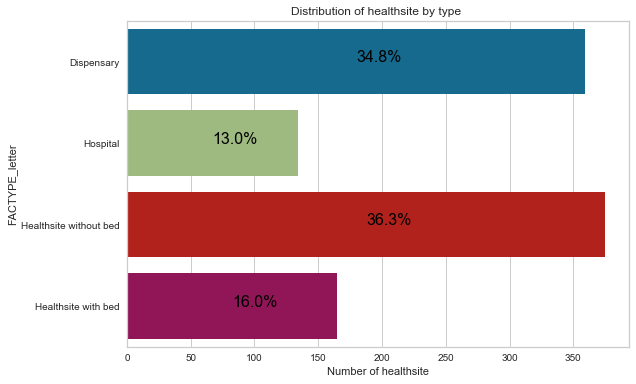

In [153]:
total = len(dfp['FACTYPE_letter'])*1.
ax = sns.countplot(y="FACTYPE_letter", data=dfp)
plt.title('Distribution of healthsite by type ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [146]:
dfpop1

,departn,commune,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male,population,beds
0,Grande'Anse,Abricots,18232,20470,38702,27.0
1,Nord,Acul du Nord,30112,30646,60758,43.0
2,Nord-Ouest,Anse-à-Foleur,18030,17982,36012,25.0
3,Sud-Est,Anse-à-Pître,21074,21524,42598,30.0
4,Nippes,Anse-à-Veau,16737,18820,35557,25.0
5,Ouest,Anse à Galets,38776,39006,77782,54.0
6,Grande'Anse,Anse d'Hainault,17694,19697,37391,26.0
7,Artibonite,Anse Rouge,25635,25789,51424,36.0
8,Sud,Aquin,52152,54229,106381,74.0
9,Ouest,Arcahaie,80940,81072,162012,113.0


In [148]:
dfp

,facil,departn,vilcomn,FACTYPE,MGA,FTYPE,Doc_General,Tech_lab,Nurse,drugist,...,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,FACTYPE_letter
0,1.0,Ouest,Port-Au-Prince,7.0,Private,1.0,2.0,1.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Dispensary
1,2.0,Ouest,Port-Au-Prince,3.0,Public,1.0,1.0,1.0,10.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Hospital
2,3.0,Ouest,Port-Au-Prince,6.0,Private,1.0,7.0,25.0,54.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Healthsite without bed
3,4.0,Ouest,Port-Au-Prince,5.0,Private,1.0,2.0,4.0,3.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Healthsite with bed
4,5.0,Ouest,Port-Au-Prince,6.0,Private,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Healthsite without bed
5,6.0,Ouest,Port-Au-Prince,6.0,Mixte,1.0,1.0,2.0,3.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,Healthsite without bed
6,8.0,Ouest,Port-Au-Prince,5.0,Private,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Healthsite with bed
7,9.0,Ouest,Port-Au-Prince,6.0,Private,1.0,2.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Healthsite without bed
8,12.0,Ouest,Port-Au-Prince,6.0,Private,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,Healthsite without bed
9,13.0,Ouest,Port-Au-Prince,6.0,Private,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Healthsite without bed


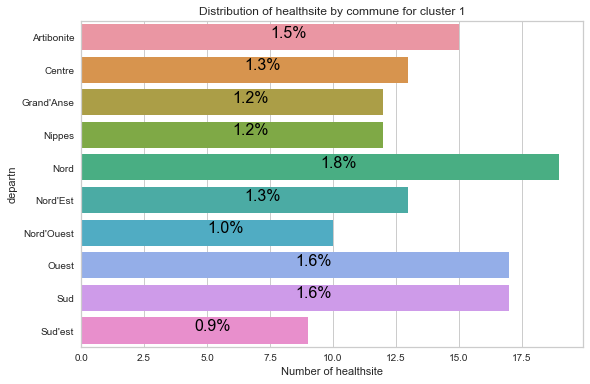

In [108]:
total = len(dfp['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_1)
plt.title('Distribution of healthsite by commune for cluster 1')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

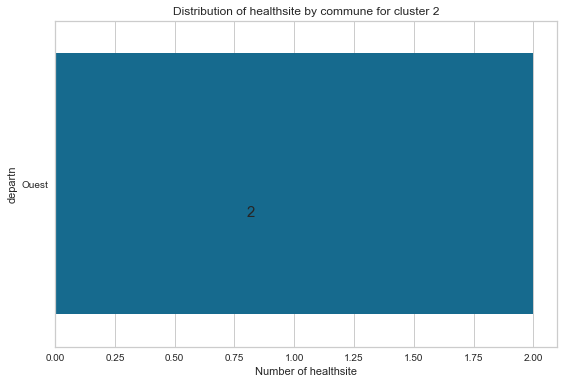

In [109]:
total = len(dfp['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_2)
plt.title('Distribution of healthsite by commune for cluster 2')
plt.xlabel('Number of healthsite')

for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 15)

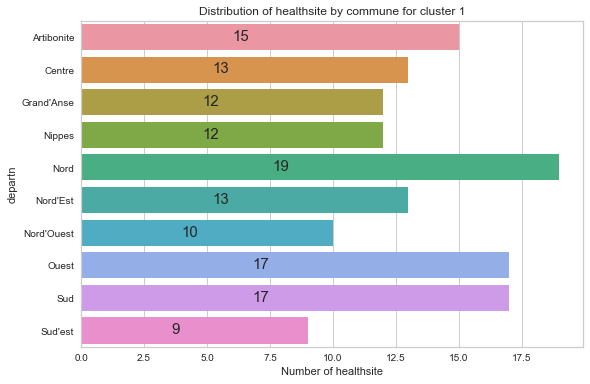

In [145]:
total = len(dfp['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_1)
plt.title('Distribution of healthsite by commune for cluster 1')
plt.xlabel('Number of healthsite')

for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 15)

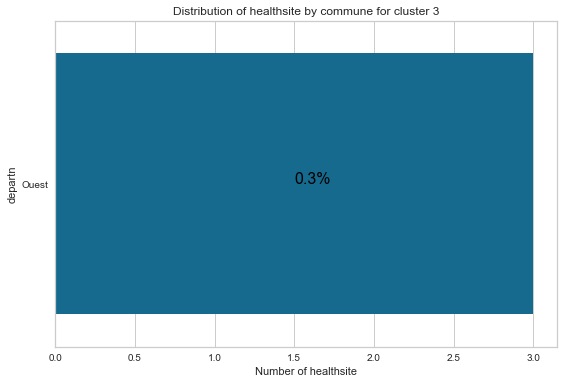

In [110]:
total = len(dfp['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_3)
plt.title('Distribution of healthsite by commune for cluster 3')
plt.xlabel('Number of healthsite')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

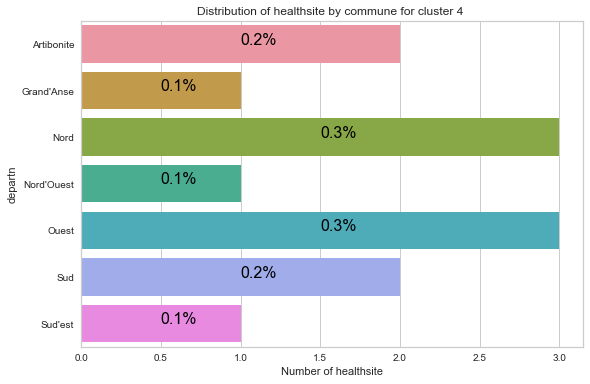

In [111]:
total = len(dfp['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_4)
plt.title('Distribution of healthsite by commune for cluster 4 ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

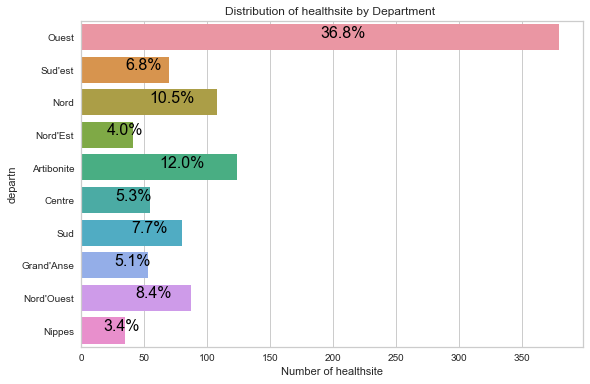

In [112]:
total = len(dfp['departn'])*1.
ax = sns.countplot(y="departn", data=dfp)
plt.title('Distribution of healthsite by Department ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

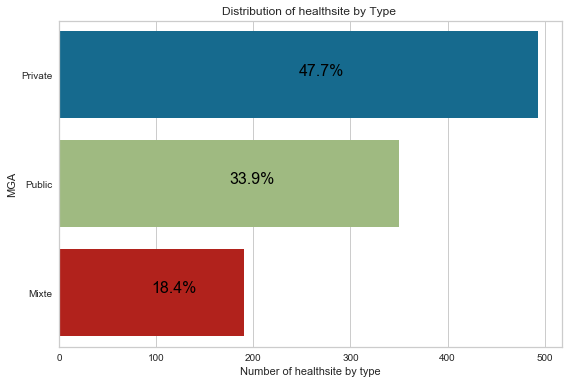

In [123]:
total = len(dfp['MGA'])*1.
ax = sns.countplot(y="MGA", data=dfp)
plt.title('Distribution of healthsite by Type ')
plt.xlabel('Number of healthsite by type')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

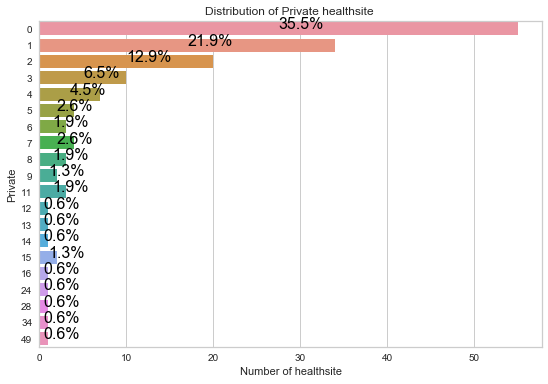

In [141]:
total = len(df['Private'])*1.
ax = sns.countplot(y="Private", data=df)
plt.title('Distribution of Private healthsite ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")    

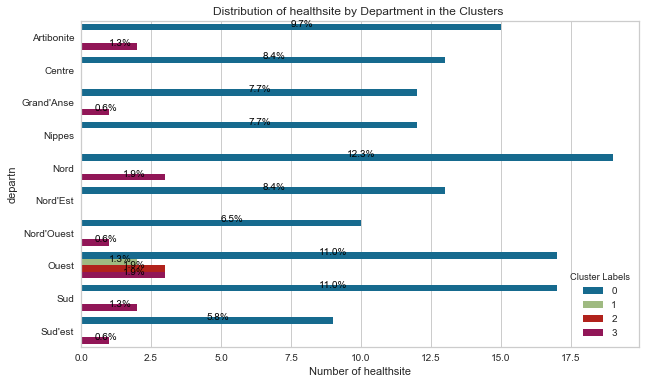

In [126]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="departn", hue='Cluster Labels', data=df)
plt.title('Distribution of healthsite by Department in the Clusters ')
plt.xlabel('Number of healthsite')
total = len(df["departn"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=10,color="black")   

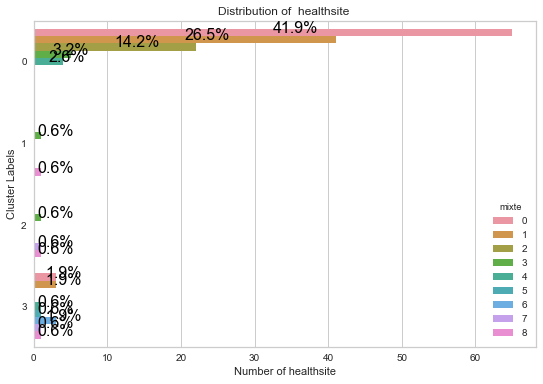

In [144]:
total = len(df['mixte'])*1.
ax = sns.countplot(y="Cluster Labels",hue='mixte', data=df)
plt.title('Distribution of  healthsite ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [130]:
df

,Cluster Labels,departn,vilcomn,facil,FACTYPE,FTYPE,Doc_General,Tech_lab,Nurse,drugist,...,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
0,0,Artibonite,Anse-Rouge,4620.0,47.0,13.0,2.0,1.0,5.0,0.0,...,1.0,0.0,0.0,0,0,7,6,1,0,0
1,0,Artibonite,Desdunes,2199.0,19.0,6.0,2.0,2.0,2.0,0.0,...,1.0,0.0,0.0,0,0,3,2,1,0,0
2,0,Artibonite,Dessalines,16267.0,135.0,40.0,7.0,10.0,42.0,0.0,...,3.0,1.0,1.0,2,15,4,15,3,2,1
3,0,Artibonite,Ennery,4410.0,43.0,13.0,4.0,10.0,11.0,1.0,...,2.0,0.0,1.0,1,1,5,4,0,2,1
4,3,Artibonite,Gona!ves,9896.0,96.0,29.0,28.0,31.0,127.0,5.0,...,8.0,1.0,4.0,1,7,8,8,1,5,2
5,0,Artibonite,Grande Saline,1460.0,12.0,4.0,3.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0,0,2,1,1,0,0
6,0,Artibonite,Gros Morne,3201.0,7.0,2.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0,1,0,1,0,0,0
7,0,Artibonite,Gros-Morne,9044.0,88.0,28.0,8.0,12.0,7.0,3.0,...,1.0,1.0,1.0,2,9,3,9,2,2,1
8,0,Artibonite,L'Est!re,2542.0,21.0,8.0,4.0,7.0,14.0,0.0,...,2.0,0.0,1.0,0,2,2,1,1,1,1
9,0,Artibonite,La Chapelle,696.0,5.0,2.0,2.0,1.0,2.0,0.0,...,1.0,0.0,1.0,1,0,0,0,1,0,0


In [132]:
cluster_4

,Cluster Labels,departn,vilcomn,facil,FACTYPE,FTYPE,Doc_General,Tech_lab,Nurse,drugist,...,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
4,3,Artibonite,Gona!ves,9896.0,96.0,29.0,28.0,31.0,127.0,5.0,...,8.0,1.0,4.0,1,7,8,8,1,5,2
12,3,Artibonite,Saint-Marc,15019.0,114.0,33.0,23.0,20.0,85.0,4.0,...,5.0,2.0,2.0,1,7,10,13,2,1,2
37,3,Grand'Anse,J!r!mie,13296.0,74.0,20.0,9.0,26.0,83.0,0.0,...,4.0,1.0,4.0,6,2,4,6,1,4,1
59,3,Nord,Cap-Ha!tien,23252.0,110.0,25.0,48.0,61.0,155.0,4.0,...,17.0,4.0,2.0,6,13,2,2,3,11,5
67,3,Nord,Milot,4240.0,30.0,10.0,1.0,15.0,114.0,4.0,...,3.0,1.0,2.0,0,4,1,2,0,2,1
71,3,Nord,Plaine-du-Nord,14287.0,78.0,24.0,40.0,41.0,80.0,4.0,...,10.0,3.0,3.0,5,8,2,3,1,6,5
99,3,Nord'Ouest,Port-de-Paix,18115.0,120.0,31.0,16.0,33.0,91.0,3.0,...,8.0,2.0,3.0,1,8,10,13,1,3,2
105,3,Ouest,Cit!-Soleil,6883.0,74.0,14.0,27.0,25.0,85.0,6.0,...,7.0,2.0,4.0,0,11,3,0,4,7,3
115,3,Ouest,L!og!ne,27755.0,152.0,52.0,42.0,39.0,140.0,7.0,...,11.0,4.0,5.0,8,14,6,3,4,15,6
117,3,Ouest,P!tion-ville,10590.0,140.0,33.0,63.0,70.0,95.0,7.0,...,17.0,6.0,8.0,7,16,3,2,1,16,7


In [ ]:
dfsite.describe()

In [ ]:
dfsite.Institution_Type.unique()

In [ ]:
dfsite['Institution_Type'].value_counts()/730*100

In [ ]:
dfsite.Catégorie.value_counts()/730*100

In [ ]:
a=1